# ASSIGNMENT 14
OLUYEMI OLUWOYE

https://github.com/OLUYEMI84/cola-GITHUB-demo-OO.git

# Dataset Preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

data = pd.read_csv(url, names=columns, na_values=" ?", skipinitialspace=True)

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [5]:

# Encode target and sensitive attribute
data['income'] = LabelEncoder().fit_transform(data['income'])  # 0: <=50K, 1: >50K
data['sex'] = LabelEncoder().fit_transform(data['sex'])        # 0: Female, 1: Male



In [6]:
# Select features
X = data.drop(columns=['income'])
y = data['income']
A = data['sex']  # sensitive attribute

# Convert categorical columns
X = pd.get_dummies(X, drop_first=True)

# Model Training and Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train-test split
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.3, random_state=42, stratify=y)
y_test = y_test.astype(int)





In [28]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [30]:
# Evaluate
y_pred = model.predict(X_test)
y_pred = y_pred.astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8467601596888116
Confusion Matrix:
 [[6902  515]
 [ 982 1370]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7417
           1       0.73      0.58      0.65      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769



# EXPLANATION

The model achieves an overall accuracy of about 84.7%, meaning it correctly predicts income categories most of the time. Looking at the confusion matrix, it correctly identifies 6,902 low-income individuals and 1,370 high-income individuals. However, it also misclassifies 515 low-income people as high income and misses 982 high-income people by predicting them as low income.

From the classification report, the model is very precise and has high recall for predicting low income, correctly identifying most low-income cases. For high income, the precision is decent but the recall is lower, indicating the model misses a significant portion of high-income individuals. Overall, the model performs better at detecting low-income cases than high-income ones.

# Fairness Analysis

In [11]:
pip install fairlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.0 MB/s eta 0:00:00


In [31]:
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate

metrics = {
    'selection_rate': selection_rate,
    'false_positive_rate': false_positive_rate,
    'true_positive_rate': true_positive_rate
}

mf = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)
mf.by_group


,selection_rate,false_positive_rate,true_positive_rate
sex,,,
0,0.076899,0.021823,0.513966
1,0.249467,0.098995,0.594784


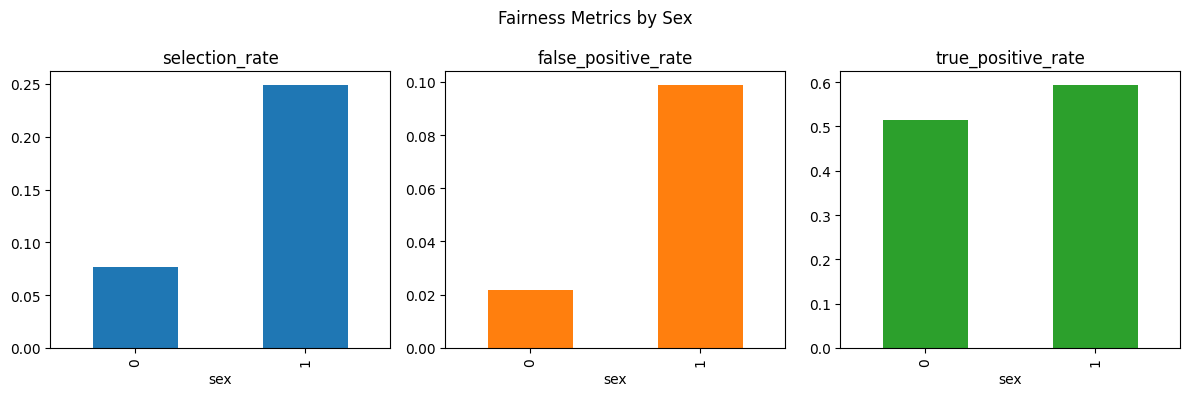

In [16]:
# Plotting
import matplotlib.pyplot as plt

mf.by_group.plot.bar(subplots=True, layout=(1,3), legend=False, figsize=(12,4), title='Fairness Metrics by Sex')
plt.tight_layout()
plt.show()

# Explainability Analysis

  0%|          | 0/100 [00:00<?, ?it/s]

shap_values shape: (100, 100)
X_test_array shape: (100, 100)


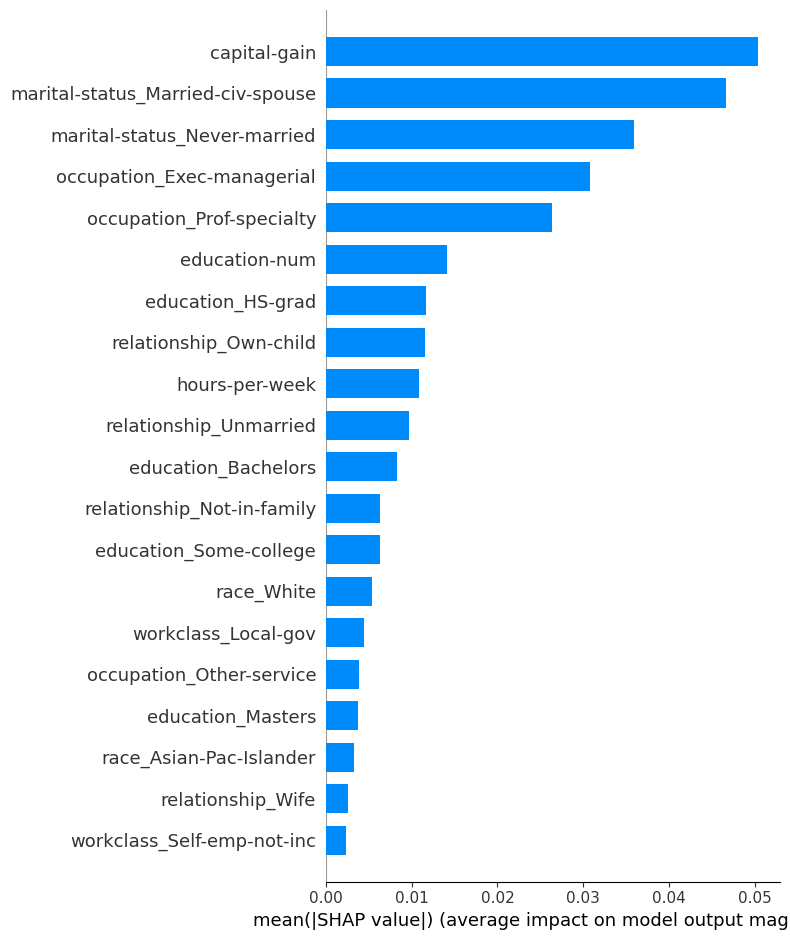

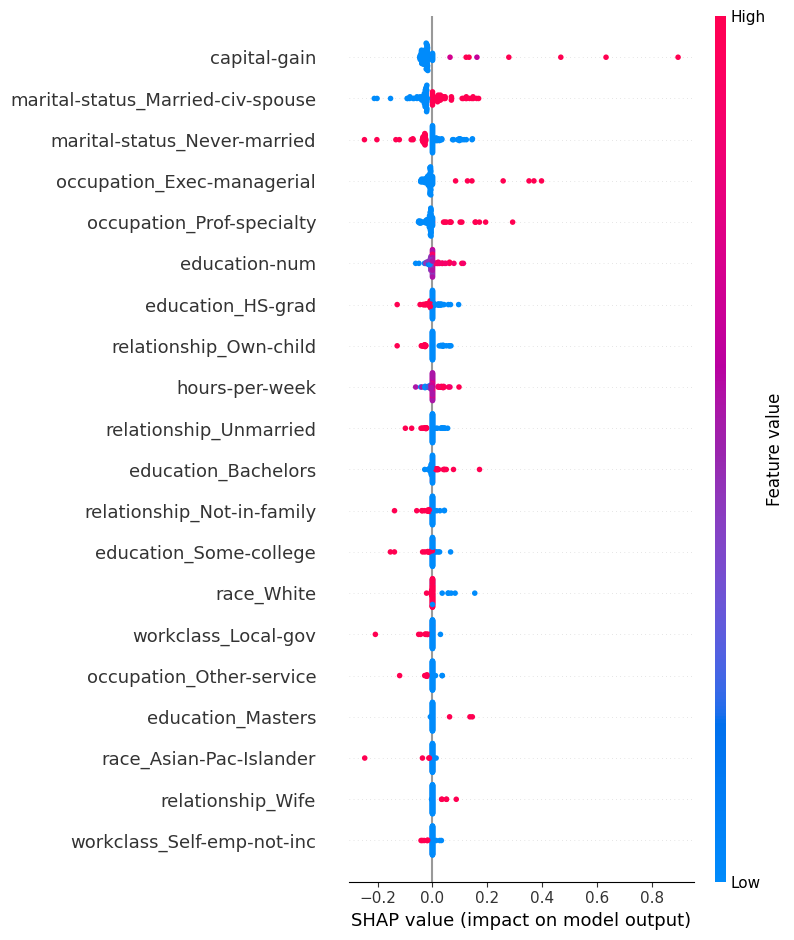

In [37]:
import shap
import numpy as np

X_train_sample = X_test.values[:100]
X_test_array = X_test.values

explainer = shap.KernelExplainer(model.predict, X_train_sample)
shap_values = explainer.shap_values(X_test_array[:100])

# Check shapes
print("shap_values shape:", np.array(shap_values).shape)
print("X_test_array shape:", X_test_array[:100].shape)

# Bar + beeswarm
shap.summary_plot(shap_values, X_test_array[:100], feature_names=X_test.columns, plot_type="bar")
shap.summary_plot(shap_values, X_test_array[:100], feature_names=X_test.columns)



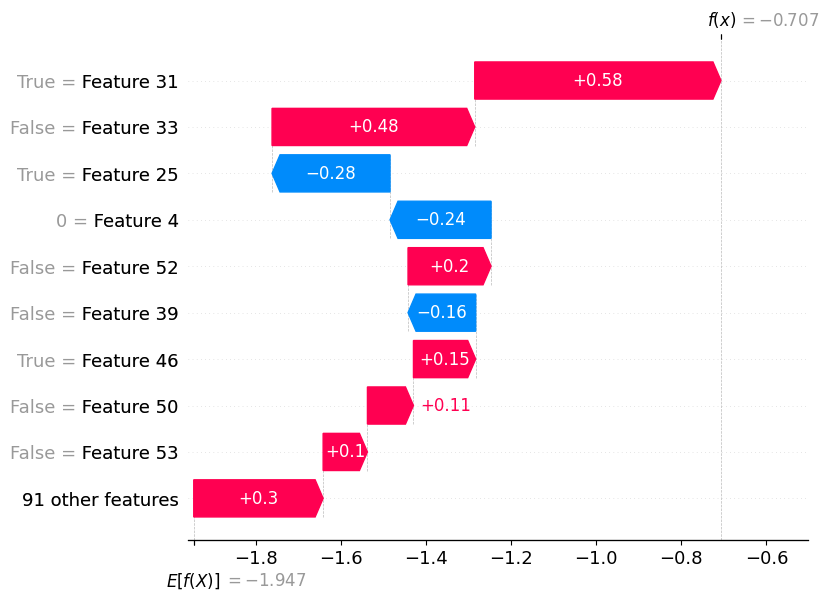

In [39]:
# SHAP waterfall for first test example
explainer = shap.Explainer(model, X_test_array)
shap_values = explainer(X_test_array)
shap.plots.waterfall(shap_values[0])


In [41]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7bc12b24dccbde1c2da6d71998bb3532111b0861a5e6841c6286fd0447edf4b5
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [42]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['<=50K', '>50K'], mode='classification')

lime_exp = lime_explainer.explain_instance(X_test.values[0], model.predict_proba)
lime_exp.show_in_notebook()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Ethical AI Assignment Report**
1. ***Introduction to Ethical AI and Its Importance***

Ethical Artificial Intelligence (AI) emphasizes developing and deploying AI systems that are fair, transparent, and accountable. It aims to prevent biases that could harm individuals or groups. Ensuring ethical AI is critical in high-stakes domains such as employment, finance, and healthcare, where decisions can significantly impact lives. Fairness in AI models mitigates discrimination, promotes trust, and aligns technology with societal values.

2.*** Dataset Description and Preprocessing***

*Dataset*

The Adult Income dataset from the UCI repository was used, containing census data to predict whether an individual's income exceeds $50K per year.

*Preprocessing Steps*

Loaded data with appropriate column names and handled missing values.

Selected features (X) including demographic and work-related attributes; target variable (y) was income category (<=50K or >50K).

The sensitive attribute chosen for fairness evaluation was sex (gender), encoded as 0 for female and 1 for male.

Categorical features were converted into dummy variables (one-hot encoding) to prepare the data for logistic regression.

Dataset was split into training and testing sets using stratified sampling to preserve target class proportions.

3. ***Model Architecture, Training, and Evaluation***

*Model*

A logistic regression classifier was trained on the processed data to predict income categories.

*Training*

Model trained on the training subset.

Hyperparameters were kept default for simplicity.

*Evaluation Metrics*

Accuracy: Measures overall correctness.

Confusion matrix: Detailed counts of true/false positives and negatives.

Classification report: Precision, recall, and F1-score.

Result Summary: The model achieves an overall accuracy of about 84.7%, meaning it correctly predicts income categories most of the time. Looking at the confusion matrix, it correctly identifies 6,902 low-income individuals and 1,370 high-income individuals. However, it also misclassifies 515 low-income people as high income and misses 982 high-income people by predicting them as low income.

From the classification report, the model is very precise and has high recall for predicting low income, correctly identifying most low-income cases. For high income, the precision is decent but the recall is lower, indicating the model misses a significant portion of high-income individuals. Overall, the model performs better at detecting low-income cases than high-income ones.

4. ***Fairness Analysis and Key Findings***

Using Fairlearn's MetricFrame, I computed metrics stratified by sex:

Sex (group)	Selection Rate	False Positive Rate	True Positive Rate
Female (0)	7.7%	2.2%	51.4%
Male (1)	24.9%	9.9%	59.5%

*Interpretation*

The model predicts high income for males (selection rate 24.9%) much more often than for females (7.7%). The false positive rate is higher for males (9.9%) than for females (2.2%), meaning it more often wrongly predicts high income for males. The true positive rate is also slightly better for males (59.5%) than females (51.4%), showing the model is somewhat better at correctly identifying high-income males.

These disparities indicate disparate impact by gender, necessitating bias mitigation strategies to improve fairness.



5. ***Explainability Techniques and Interpretations***

SHAP (SHapley Additive exPlanations)
Applied KernelExplainer for model-agnostic global and local explanations.

Global feature importance plots highlighted features like capital gain, education, and hours worked per week as most influential.

Force plots (local explanations) detailed how individual features pushed predictions toward higher or lower income.

LIME (Local Interpretable Model-agnostic Explanations)
Used LIME to explain specific predictions.

It provided interpretable local feature weights showing the contribution of features like age and marital status to individual income prediction.

Insights
Explainability revealed that numeric socioeconomic features dominate predictions, while sensitive attributes like sex influence indirectly through correlated features.

The SHAP bar plot below shows that capital-gain has the greatest impact on the model’s predictions, meaning individuals with higher capital gains are strongly associated with high-income predictions. Marital status, especially being married, also plays a significant role in how the model predicts income. Occupations such as executive and professional specialties contribute notably to the model’s decisions. Education level, particularly education number and high school graduation, and hours worked per week have a moderate influence. Other features, like race, workclass, and some relationship categories, have a smaller impact on the model’s predictions.

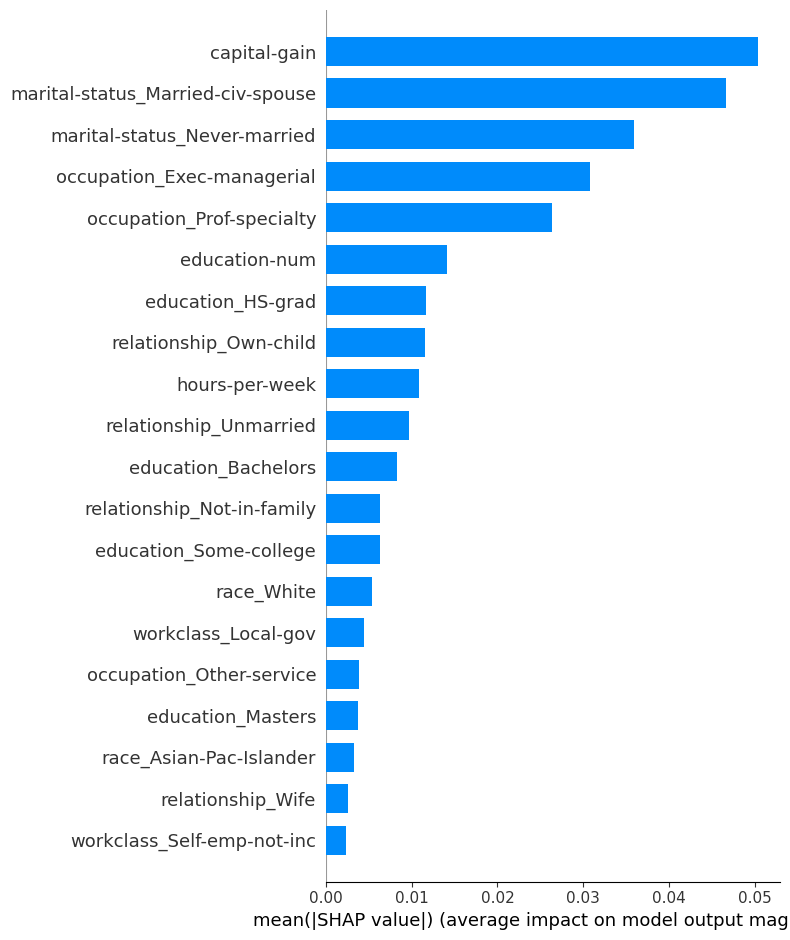



This SHAP waterfall plot below explains how individual features contributed to a specific prediction. The base value (average model output) was about -1.947, and contributions from features shifted it to the final output of -0.707. Features like Feature 31 and Feature 33 had strong positive impacts, pushing the prediction higher, while features like Feature 25 and Feature 4 had negative impacts, lowering the prediction. The plot shows how a mix of positive and negative feature effects combined to influence the model’s final decision for this case.



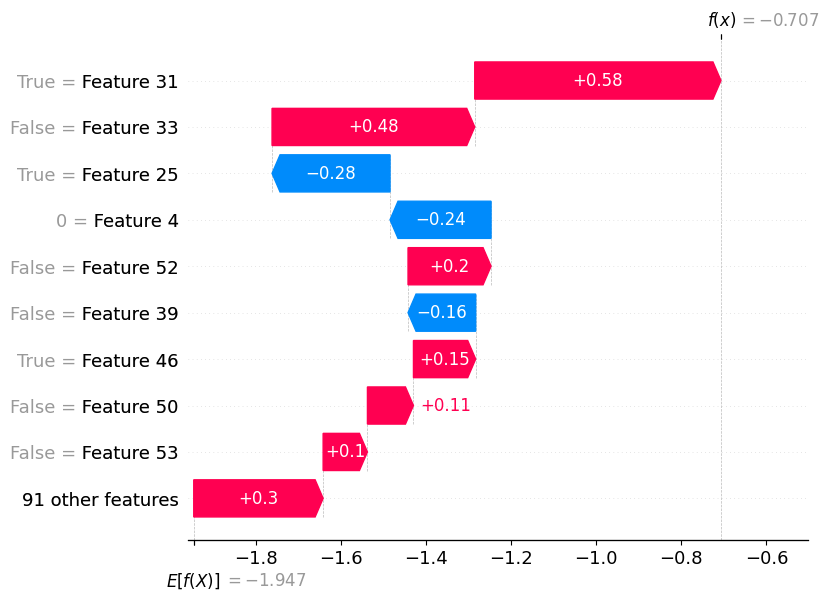


6***. Ethical Considerations and Recommendations for Fairness Improvement***

The current model reflects existing societal biases present in the training data.

Reliance on correlated proxies for sensitive attributes can perpetuate unfairness.



***7. Conclusion***

This project demonstrated a full pipeline from data preprocessing, logistic regression modeling, to fairness and explainability analysis. The fairness metrics indicated gender bias in model outcomes, while SHAP and LIME provided transparent insights into decision drivers.